In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


/Users/davideads/VirtualEnvs/sanctuary-cities/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Basic analysis of pre-processed sanctuary city data

Currently, this notebook does not handle any processing. Run the appropriate shell scripts in the project directory, then run this notebook.

## Detainers over time

**Original question**: How have the number of detainers issued over time changed? Up, down through the years? 

**Answer**: It depends on whether you look at whether lifted or not. Either way, they're going down.

### All detainers by year (lifted or not)

The total number of detainers issued, whether or not they have a lift_reason, peaked in 2011 with 314,966. The drop-off after 2011 has a steeper slop than the ramp-up to 2011.

In [2]:
all_detainers_by_year = pd.read_csv('export/all_detainers_by_year.csv')

#### Basic stats

In [3]:
all_detainers_by_year['count'].describe()

count         9.000000
mean     201647.555556
std      102459.190532
min       39124.000000
25%      147849.000000
50%      228077.000000
75%      272878.000000
max      314966.000000
Name: count, dtype: float64

#### Table

In [4]:
all_detainers_by_year

,year,count
0,2007,39124
1,2008,228077
2,2009,256947
3,2010,301119
4,2011,314966
5,2012,272878
6,2013,204215
7,2014,147849
8,2015,49653


#### Plot

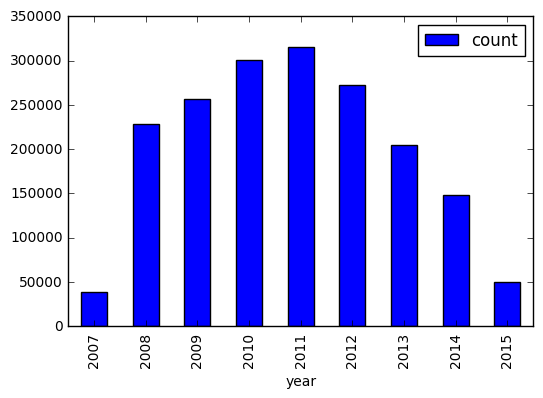

In [5]:
all_detainers_by_year.plot(kind="bar", x="year", y="count")

### All detainers by year (only those lifted)

The picture is somewhat different when looking at only those detainers that have a lift reason. When we look at the data this way, 2008 is the highest year and the trend in downward from there. It's not clear what to make of this. The previous analysis (all detainers, lift reason or not) is probably best for understanding what ICE was doing. This way of looking at the numbers _might_ be more valuable for understanding what LEAs were doing. 

In [6]:
lifted_detainers_by_year = pd.read_csv('export/lifted_detainers_by_year.csv')

#### Basic stats

In [7]:
lifted_detainers_by_year['count'].describe()

count         9.000000
mean     109656.111111
std       56610.356176
min       16526.000000
25%       75480.000000
50%      138026.000000
75%      153808.000000
max      161443.000000
Name: count, dtype: float64

#### Table

In [8]:
lifted_detainers_by_year

,year,count
0,2007,30516
1,2008,161443
2,2009,152195
3,2010,153808
4,2011,156876
5,2012,138026
6,2013,102035
7,2014,75480
8,2015,16526


#### Plot

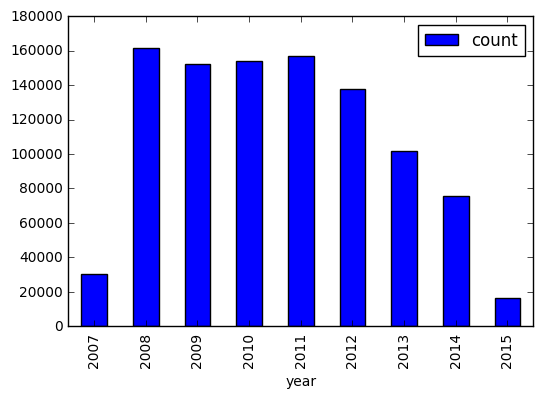

In [9]:
lifted_detainers_by_year.plot(kind="bar", x="year", y="count")

## Detainer types

**Original question:** How have the number of I247, I247N and I247D changed over time? Has the administration stopped issuing I247 forms? 

**Answer:** It's complicated and pretty hard to say. 

Unfortunately, the data only has detainer types for 2014 and 2015.

One thing is certain: The I247 (as of March 2013) detainer type dominates in the years we have available, which is perhaps not a surprise.

More interesting: Even though 2015 data is incomplete, the number of I247s is higher. 

In [10]:
detainers_by_type_and_year = pd.read_csv('export/detainers_by_type_and_year.csv')
detainers_by_type_and_year_pivot = detainers_by_type_and_year.pivot(index="year", columns="detainer_type")
detainers_by_type_and_year_pivot

count  \
detainer_type I247 - Immigration Detainer - Notice of Action (as of March 2013)   
year                                                                              
2014                                                       29310                  
2015                                                       46187                  

                                                                                    \
detainer_type I247 - Immigration Detainer - Notice of Action (prior to March 2013)   
year                                                                                 
2014                                                          80                     
2015                                                         119                     

                                                                 \
detainer_type I247D - Immigration Detainer - Request for Action   
year                                                              
2014                                                          6   
2015                                                       2805   

                                                                      
detainer_type I247N - Immigration Advisal - Request for Notification  
year                                                                  
2014                                                           4      
2015                                                         542

## %s of total by year

In [11]:
detainers_by_life_reason_and_year = pd.read_csv('export/detainers_by_lift_reason_and_year.csv')
detainers_by_life_reason_and_year_pivot = detainers_by_life_reason_and_year.pivot(index="year", columns="lift_reason")
detainers_by_life_reason_and_year_pivot

count                        \
lift_reason Alien Not Subject to Deportation Booked into Detention   
year                                                                 
2007                                      42                 11295   
2008                                     229                 74190   
2009                                     234                 93037   
2010                                     227                104341   
2011                                     234                123107   
2012                                     275                112049   
2013                                     216                 80828   
2014                                     251                 50072   
2015                                     138                 10122   

                                                                            \
lift_reason Case Closed Detainer Declined by LEA Died Early Release Lifted   
year                                                                         
2007              13655                       11   28           629   4067   
2008              48618                       64  100          2301  30809   
2009              15582                       66   78          2308  36755   
2010              10042                      121   66          2638  32509   
2011               7139                      279   61          1790  21655   
2012               5247                      942   33           546  17193   
2013               2988                     2378   18           280  13843   
2014               1610                    13595   14           178   8404   
2015                266                     2785    3            41   2639   

                                                           \
lift_reason Lifted - Lack of Funds Lifted - Lack of Space   
year                                                        
2007                             8                      4   
2008                            66                     46   
2009                           158                     85   
2010                           235                     43   
2011                            39                     40   
2012                            41                     58   
2013                            87                     57   
2014                            25                     29   
2015                             7                      4   

                                                  \
lift_reason Prosecutorial Discretion Transferred   
year                                               
2007                               2         760   
2008                              10        4934   
2009                              16        3800   
2010                              28        3457   
2011                              55        2374   
2012                             441        1051   
2013                             457         825   
2014                             640         586   
2015                             282         201   

                                               
lift_reason United States Citizen Interviewed  
year                                           
2007                                       15  
2008                                       76  
2009                                       76  
2010                                      101  
2011                                      103  
2012                                      150  
2013                                       58  
2014                                       76  
2015                                       38

In [50]:
detainers_by_life_reason_and_year_pivot = detainers_by_life_reason_and_year.pivot_table(index="year", columns="lift_reason")
detainers_by_life_reason_and_year_pivot_pct = detainers_by_life_reason_and_year_pivot.apply(lambda x : 100 * (x / x.sum()), axis=1)
detainers_by_life_reason_and_year_pivot_pct

count                        \
lift_reason Alien Not Subject to Deportation Booked into Detention   
year                                                                 
2007                                0.137633             37.013370   
2008                                0.141846             45.954300   
2009                                0.153750             61.130129   
2010                                0.147587             67.838474   
2011                                0.149162             78.474081   
2012                                0.199238             81.179633   
2013                                0.211692             79.215955   
2014                                0.332538             66.338103   
2015                                0.835048             61.248941   

                                                                          \
lift_reason Case Closed Detainer Declined by LEA      Died Early Release   
year                                                                       
2007          44.747018                 0.036047  0.091755      2.061214   
2008          30.114653                 0.039642  0.061941      1.425271   
2009          10.238181                 0.043365  0.051250      1.516476   
2010           6.528919                 0.078670  0.042911      1.715125   
2011           4.550728                 0.177847  0.038884      1.141029   
2012           3.801458                 0.682480  0.023909      0.395578   
2013           2.928407                 2.330573  0.017641      0.274416   
2014           2.133015                18.011394  0.018548      0.235824   
2015           1.609585                16.852233  0.018153      0.248094   

                                                                      \
lift_reason     Lifted Lifted - Lack of Funds Lifted - Lack of Space   
year                                                                   
2007         13.327435               0.026216               0.013108   
2008         19.083516               0.040881               0.028493   
2009         24.149939               0.103814               0.055849   
2010         21.136092               0.152788               0.027957   
2011         13.803896               0.024860               0.025498   
2012         12.456349               0.029705               0.042021   
2013         13.566913               0.085265               0.055863   
2014         11.134075               0.033121               0.038421   
2015         15.968776               0.042357               0.024204   

                                                  \
lift_reason Prosecutorial Discretion Transferred   
year                                               
2007                        0.006554    2.490497   
2008                        0.006194    3.056187   
2009                        0.010513    2.496797   
2010                        0.018205    2.247607   
2011                        0.035060    1.513297   
2012                        0.319505    0.761451   
2013                        0.447886    0.808546   
2014                        0.847907    0.776365   
2015                        1.706402    1.216265   

                                               
lift_reason United States Citizen Interviewed  
year                                           
2007                                 0.049155  
2008                                 0.047075  
2009                                 0.049936  
2010                                 0.065666  
2011                                 0.065657  
2012                                 0.108675  
2013                                 0.056843  
2014                                 0.100689  
2015                                 0.229941

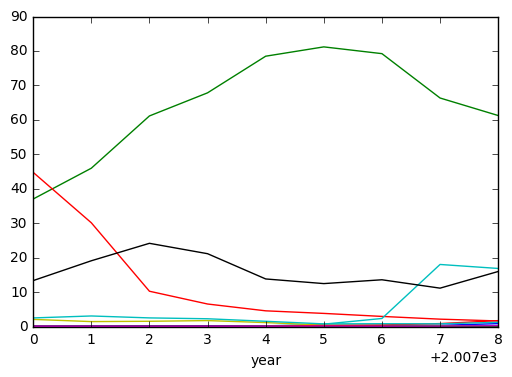

In [58]:
detainers_by_life_reason_and_year_pivot_pct.plot(legend=False)